In [1]:
%load_ext watermark
%watermark -a "Brett Montague" -nmv --packages numpy,statsmodels,scipy,pandas,sklearn,matplotlib,networkx,notebook

Brett Montague Thu Mar 14 2019 

CPython 3.6.4
IPython 6.4.0

numpy 1.16.2
statsmodels 0.8.0
scipy 1.0.0
pandas 0.22.0
sklearn 0.19.1
matplotlib 2.2.2
networkx 2.1
notebook 5.6.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 69 Stepping 1, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

import os
os.environ['PROJ_LIB'] = r'C:\Users\Brett\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap

**Load Wellfacts.txt into a dataframe** 

In [3]:
df = pd.read_csv('WellFacts.txt', sep='\t', low_memory=False)

**List the features (columns) of our dataframe**

In [4]:
list(df)

['EPAssetsId',
 'Province',
 'LicenceNumber',
 'UWI',
 'CurrentOperator',
 'CurrentOperatorParent',
 'CurrentOperatorID',
 'Licensee',
 'LicenseeParentCompany',
 'LicenseeID',
 'LicenceDate',
 'CurrentStatus',
 'CurrentStatusStandardised',
 'WellType',
 'WellTypeStandardised',
 'ConfidentialReleaseDate',
 'AbandonDate',
 'SurfAbandonDate',
 'WellName',
 'WellNameAmended',
 'Formation',
 'Field',
 'Pool',
 'SurveySystem',
 'Surf_Location',
 'Surf_Township',
 'Surf_Meridian',
 'Surf_Range',
 'Surf_Section',
 'Surf_LSD',
 'Surf_Longitude',
 'Surf_Latitude',
 'Surf_TownshipRange',
 'Surf_QuarterUnit',
 'Surf_Unit',
 'Surf_Block',
 'Surf_NTSMapSheet',
 'Surf_Series',
 'Surf_Area',
 'Surf_Sheet',
 'Surf_QuarterSection',
 'BH_Location',
 'BH_TownshipRange',
 'BH_QuarterUnit',
 'BH_Unit',
 'BH_Block',
 'BH_NTSMapSheet',
 'BH_Series',
 'BH_Area',
 'BH_Sheet',
 'BH_QuarterSection',
 'BH_Longitude',
 'BH_Latitude',
 'BH_Township',
 'BH_Meridian',
 'BH_Range',
 'BH_Section',
 'BH_LSD',
 'GroundEle

**See how many observations (rows) for each Province**

In [5]:
df['Province'].value_counts()

Alberta             618200
Saskatchewan        165381
British Columbia     43064
Manitoba             12235
Name: Province, dtype: int64

**See how many observation for each well type**

In [6]:
df['WellSymbPt1'].value_counts()

Other        284020
Gas          271096
Oil          254711
Injection     29046
Oil & Gas         7
Name: WellSymbPt1, dtype: int64

**See how many observations for each well class**

In [7]:
df['LaheeClass'].value_counts()

Development                 540225
New Pool Wildcat             79978
Outpost                      67562
Oil Sands Evaluation         43598
Deeper Pool Test             30742
New Field Wildcat            25289
Development Service Well     13585
Test Hole                    12545
Other                         9235
Unspecified                   8040
Re-entry                      4035
Experimental                  3519
Confidential                   481
Potash Test Hole                21
Non Issued Licence              15
Shallower Pool Test              9
Deeper Pool Wildcat              1
Name: LaheeClass, dtype: int64

**See how many observations for each well profile**

In [8]:
df['WellProfile'].value_counts()

Vertical          589418
Directional       131177
Horizontal        118113
Horizontal Leg        91
Slant                 81
Name: WellProfile, dtype: int64

**Examine the unique pools values**

In [9]:
df['Pool'].value_counts()

Unspecified                       239235
Commingled MFP9501                 99620
Commingled Pool 001                16990
Not Available                      14925
Wabiskaw-Mcmurray                  14454
Lower Grand Rapids                 11138
Temporary Commingled                9882
Commingled MFP9529                  9767
Clearwater                          8498
Cardium                             8373
Commingled Pool 002                 6855
Commingled MFP9515                  6759
Upper Grand Rapids                  6043
Dodsland Viking                     5418
Hatton Milk River-Medicine Hat      5183
Viking                              4993
Commingled Pool 003                 4957
Hatton Milk River                   4529
Viewfield Bakken                    4445
Montney A                           4258
Commingled Pool 005                 3434
Commingled Pool 004                 3274
Weyburn Midale                      2899
Mannville                           2688
Commingled MFP95

**Rename all observations that contain the word "Viking" to "Viking".  eg. "Avon Hill Viking" becomes "Viking"**

In [10]:
df.loc[df['Pool'].str.contains('Viking', na=False), 'Pool'] = 'Viking'

**Create a new dataframe that only contains our cleaned "Viking" Pool observations**

In [11]:
df_viking = df[df["Pool"].str.contains('Viking', na=False)]

**Keep only wells drilled in the Viking formation in the Viking Pool**

In [12]:
df_viking = df_viking[df_viking["Formation"].str.contains('Viking', na=False)]

**Keep only the Saskatchewan wells in the Viking Pool drilled in the Viking Formation**

In [13]:
df_viking = df_viking[df_viking["Province"].str.contains('Saskatchewan', na=False)]

**Keep only horizontal wells**

In [14]:
df_viking = df_viking[df_viking['WellProfile'].str.contains('Horizontal', na=False)]

**Keep only oil wells**

In [15]:
df_viking = df_viking[df_viking['WellSymbPt1'].str.contains('Oil', na=False)]

**Keep only development wells**

In [16]:
df_viking = df_viking[df_viking['LaheeClass'].str.contains('Development', na=False)]

**Keep only wells spudded within the past 10 years**

In [17]:
df_viking = df_viking[(df_viking['SpudDate'] > '2009-03-12')]

**See what we have remaining**

In [18]:
df_viking.describe()

,EPAssetsId,CurrentOperatorParent,CurrentOperatorID,LicenseeParentCompany,LicenseeID,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,GroundElevation,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,TVD,NumberofWells,ProjectedDepth
count,6750.000,6750.000,6672.000,6750.000,0.000,6750.000,6750.000,6651.000,6651.000,6750.000,6664.000,6748.000,6697.000,6750.000,6745.000,6750.000,6750.000
mean,1138309.340,1387.586,24363.390,1400.350,nan,-108.954,51.553,-108.953,51.554,689.431,693.398,1570.328,4.530,816.142,704.954,1.000,706.887
std,36978.247,1508.490,25603.157,1534.872,nan,0.421,0.204,0.419,0.204,26.670,26.690,267.026,13.317,477.345,69.916,0.000,36.629
min,1014997.000,102.000,0.000,102.000,nan,-110.002,50.969,-110.003,50.970,571.900,572.900,0.000,0.000,0.000,0.000,1.000,71.000
25%,1141094.250,168.000,11121.000,168.000,nan,-109.287,51.508,-109.287,51.510,678.000,682.000,1453.000,2.000,497.000,692.580,1.000,692.300
50%,1149775.500,1576.000,12746.000,1576.000,nan,-108.952,51.576,-108.949,51.576,695.000,699.100,1496.000,2.000,741.500,709.000,1.000,708.000
75%,1163543.250,1606.000,34381.000,1606.000,nan,-108.652,51.687,-108.648,51.687,705.800,709.825,1559.000,3.000,1138.250,728.300,1.000,727.000
max,1173042.000,9631.000,72646.000,9631.000,nan,-107.751,51.946,-107.738,51.941,770.900,775.000,2859.000,708.000,2369.000,2065.000,1.000,1530.000


**Set a cutoff for maximum number of days drilling (something has usually gone very wrong if you're drilling a Viking well for > 14 days.)**

In [19]:
df_viking = df_viking.drop(df_viking[df_viking['DaysDrilling'] > 14].index)

**See what's left**

In [20]:
df_viking.describe()

,EPAssetsId,CurrentOperatorParent,CurrentOperatorID,LicenseeParentCompany,LicenseeID,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,GroundElevation,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,TVD,NumberofWells,ProjectedDepth
count,6377.000,6377.000,6306.000,6377.000,0.000,6377.000,6377.000,6284.000,6284.000,6377.000,6296.000,6376.000,6324.000,6377.000,6373.000,6377.000,6377.000
mean,1138792.130,1410.914,23275.846,1424.693,nan,-108.956,51.557,-108.955,51.557,689.390,693.367,1573.917,2.552,860.490,704.552,1.000,706.535
std,37120.048,1499.557,24890.858,1526.248,nan,0.420,0.204,0.418,0.204,26.480,26.488,270.798,2.162,453.369,71.395,0.000,36.731
min,1014997.000,102.000,0.000,102.000,nan,-110.002,50.969,-110.003,50.970,571.900,572.900,0.000,0.000,0.000,0.000,1.000,71.000
25%,1141325.000,168.000,11121.000,168.000,nan,-109.287,51.510,-109.287,51.511,678.100,682.075,1454.000,2.000,528.750,692.500,1.000,692.000
50%,1150271.000,1576.000,12746.000,1576.000,nan,-108.958,51.579,-108.956,51.579,694.900,699.000,1498.000,2.000,747.500,708.900,1.000,708.000
75%,1163977.000,1606.000,13986.000,1606.000,nan,-108.653,51.694,-108.649,51.693,705.800,709.800,1564.000,3.000,1169.000,727.900,1.000,726.000
max,1173042.000,9631.000,72646.000,9631.000,nan,-107.751,51.946,-107.738,51.941,770.900,775.000,2700.000,14.000,2369.000,2065.000,1.000,1530.000


**Drop observations with NaN values for Drilling Contractor**

In [21]:
df_viking = df_viking[pd.notnull(df_viking['DrillingContractor'])]

**Data has been somewhat wrangled, so let's see who is drilling these Sask. Viking formation oil wells:**

In [22]:
df_viking['DrillingContractor'].value_counts()

Savanna Drilling                                                   1233
Precision Drilling Corporation                                     1036
Champion Drilling                                                   734
Ensign Canadian Drilling                                            547
Bonanza Drilling Inc.                                               414
Savanna Drilling Corp.                                              395
Tempco Drilling Company Inc.                                        360
Contract Driller Unknown                                            292
Ensign Drilling Inc. (Nisku)                                        212
Trinidad Drilling Ltd.                                              194
Ensign Drilling Partnership                                         177
Horizon Drilling Inc.                                               156
Ensign Energy Services Inc.                                         130
Ensigns Drilling                                                

**Seems like there may be some data entry issues here, with 5 different versions of "Ensign" and multiple "Savanna" and "Precision" entries.  For the sake of this analysis, let's combine them**

In [23]:
def combine_drilling_companies(dataframe, drilling_company_name):
    dataframe.loc[dataframe['DrillingContractor'].str.contains(drilling_company_name, na=False), 'DrillingContractor'] = str(drilling_company_name) + ' Drilling'
    
    return(dataframe)

In [24]:
df_viking = combine_drilling_companies(df_viking, 'Savanna')
df_viking = combine_drilling_companies(df_viking, 'Ensign')
df_viking = combine_drilling_companies(df_viking, 'Precision')

In [25]:
df_viking['DrillingContractor'].value_counts()

Savanna Drilling                    1629
Ensign Drilling                     1210
Precision Drilling                  1121
Champion Drilling                    734
Bonanza Drilling Inc.                414
Tempco Drilling Company Inc.         360
Contract Driller Unknown             292
Trinidad Drilling Ltd.               194
Horizon Drilling Inc.                156
Lasso Drilling Corporation            41
Xtreme Drilling & Coil Services       40
Raging River Exploration Inc.         32
Nabors Drilling                       22
Quintera Drilling Ltd.                21
Extreme Drilling                      20
Spartan Energy Corp.                  20
Chinook Drilling Ltd.                 11
Predator Drilling Inc.                10
Terroco Drilling Ltd.                  4
Cona Resources Ltd.                    3
Manning Robert L                       2
Kunkel, C.f.                           1
K.t. Flanagan Land Services Ltd.       1
Sunny Resources Inc.                   1
Panther Drilling

**Looks good, now let's get rid of "Unspecified" and "Contract Driller Unknown" observations**

In [26]:
df_viking = df_viking[df_viking['DrillingContractor'] != 'Unspecified']

In [27]:
df_viking = df_viking[df_viking['DrillingContractor'] != 'Contract Driller Unknown']

In [28]:
df_viking['DrillingContractor'].value_counts()

Savanna Drilling                    1629
Ensign Drilling                     1210
Precision Drilling                  1121
Champion Drilling                    734
Bonanza Drilling Inc.                414
Tempco Drilling Company Inc.         360
Trinidad Drilling Ltd.               194
Horizon Drilling Inc.                156
Lasso Drilling Corporation            41
Xtreme Drilling & Coil Services       40
Raging River Exploration Inc.         32
Nabors Drilling                       22
Quintera Drilling Ltd.                21
Extreme Drilling                      20
Spartan Energy Corp.                  20
Chinook Drilling Ltd.                 11
Predator Drilling Inc.                10
Terroco Drilling Ltd.                  4
Cona Resources Ltd.                    3
Manning Robert L                       2
Kunkel, C.f.                           1
K.t. Flanagan Land Services Ltd.       1
Sunny Resources Inc.                   1
Panther Drilling Corporation           1
Name: DrillingCo

**Set a cutoff for minimum number of wells drilled by contractor to 10**

In [29]:
s = df_viking['DrillingContractor'].value_counts()

df_viking = df_viking[df_viking.isin(s.index[s >= 10]).values]

In [30]:
df_viking['DrillingContractor'].value_counts()

Savanna Drilling                   1631
Ensign Drilling                    1210
Precision Drilling                 1121
Champion Drilling                   734
Bonanza Drilling Inc.               414
Tempco Drilling Company Inc.        361
Trinidad Drilling Ltd.              194
Horizon Drilling Inc.               156
Lasso Drilling Corporation           41
Xtreme Drilling & Coil Services      40
Raging River Exploration Inc.        32
Nabors Drilling                      22
Quintera Drilling Ltd.               21
Extreme Drilling                     20
Spartan Energy Corp.                 20
Chinook Drilling Ltd.                11
Predator Drilling Inc.               10
Name: DrillingContractor, dtype: int64

**Plot wells on Lat / Longs as a sanity check on the data reflecting the region we're looking at**

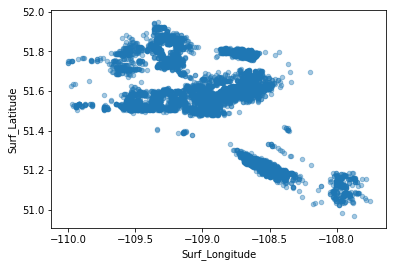

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
df_viking.plot(kind="scatter", x="Surf_Longitude", y="Surf_Latitude", alpha=0.4)
plt.show()

**Plot on a properly projected map**

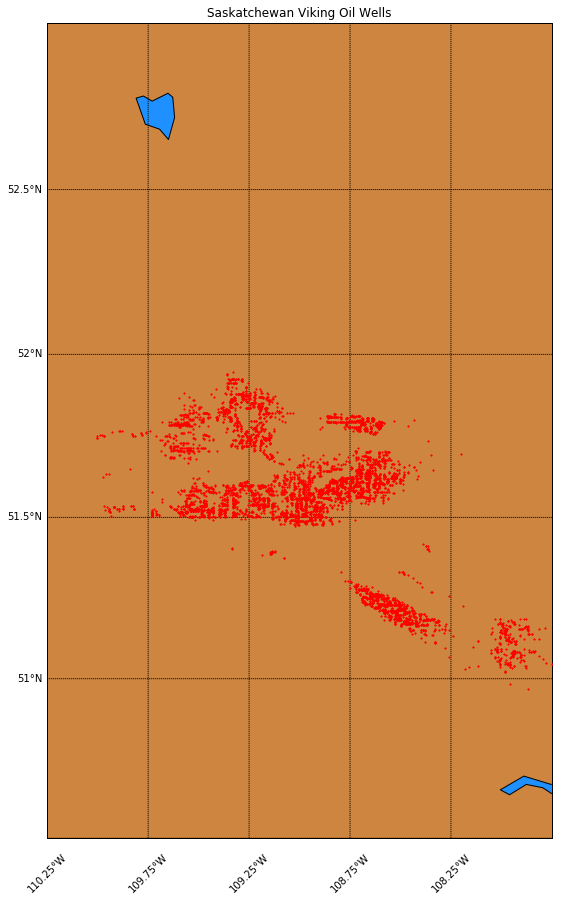

In [32]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# input desired coordinates
my_coords = [51.75,-109]

# How much to zoom from coordinates (in degrees)
zoom_scale = 1.25

# Setup the bounding box for the zoom and bounds of the map
bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
        my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]

plt.figure(figsize=(30,15))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(df_viking['Surf_Longitude'].values,df_viking['Surf_Latitude'].values)
m.scatter(x,y,marker='D',color='r', zorder=10, s=1)
plt.title("Saskatchewan Viking Oil Wells")
plt.savefig('coordinate_test.png', format='png', dpi=500)
plt.show()

In [33]:
''' Take a column(first_colum_name) of a dataframe and for each unique value in that column, calculate mean value of
another column(second_column_name) '''

def calculate_column_means(dataframe, first_column_name, second_column_name):
    company_name = []
    mean_value = []
    for item in list(dataframe[first_column_name].unique()):
        company_name.append(item)
        mean_value.append(dataframe.loc[dataframe[first_column_name] == item][second_column_name].mean())
    return list(zip(company_name, mean_value))
    
    

**Get the results from the previous function**

In [34]:
my_result = calculate_column_means(df_viking, 'DrillingContractor', 'DrillMetresPerDay')

In [35]:
my_result.sort(key=lambda x: x[1])

**Print the results, in order of mean metres drill per day.**

In [36]:
for item in reversed(my_result):
    print(item)

('Raging River Exploration Inc.', 1327.877840909091)
('Lasso Drilling Corporation', 1060.4267421602785)
('Ensign Drilling', 1025.037969101147)
('Horizon Drilling Inc.', 930.6560028646567)
('Savanna Drilling', 930.0576503285869)
('Tempco Drilling Company Inc.', 912.9201062649263)
('Bonanza Drilling Inc.', 854.084529354167)
('Spartan Energy Corp.', 803.125)
('Precision Drilling', 791.456962242832)
('Champion Drilling', 747.9134517510947)
('Quintera Drilling Ltd.', 666.7698412698412)
('Nabors Drilling', 633.8863636363636)
('Chinook Drilling Ltd.', 607.7969696969697)
('Xtreme Drilling & Coil Services', 572.4583333333334)
('Extreme Drilling', 489.13678571428557)
('Trinidad Drilling Ltd.', 475.986560282501)
('Predator Drilling Inc.', 272.975)


### Using lat / long / tvd / operator / drilling contractor as dimensions in our model, can we predict how many metres per day will be drilled?

**One hot encode categorical features.**

In [37]:
df_viking['DrillingContractor'] = pd.Categorical(df_viking['DrillingContractor'])

In [38]:
df_viking['CurrentOperatorParent'] = pd.Categorical(df_viking['CurrentOperatorParent'])

In [39]:
df_viking = pd.concat([df_viking, pd.get_dummies(df_viking['DrillingContractor'], prefix = 'category')],axis=1)

In [40]:
df_viking = pd.concat([df_viking, pd.get_dummies(df_viking['CurrentOperatorParent'], prefix = 'category')],axis=1)

In [41]:
list(df_viking)

['EPAssetsId',
 'Province',
 'LicenceNumber',
 'UWI',
 'CurrentOperator',
 'CurrentOperatorParent',
 'CurrentOperatorID',
 'Licensee',
 'LicenseeParentCompany',
 'LicenseeID',
 'LicenceDate',
 'CurrentStatus',
 'CurrentStatusStandardised',
 'WellType',
 'WellTypeStandardised',
 'ConfidentialReleaseDate',
 'AbandonDate',
 'SurfAbandonDate',
 'WellName',
 'WellNameAmended',
 'Formation',
 'Field',
 'Pool',
 'SurveySystem',
 'Surf_Location',
 'Surf_Township',
 'Surf_Meridian',
 'Surf_Range',
 'Surf_Section',
 'Surf_LSD',
 'Surf_Longitude',
 'Surf_Latitude',
 'Surf_TownshipRange',
 'Surf_QuarterUnit',
 'Surf_Unit',
 'Surf_Block',
 'Surf_NTSMapSheet',
 'Surf_Series',
 'Surf_Area',
 'Surf_Sheet',
 'Surf_QuarterSection',
 'BH_Location',
 'BH_TownshipRange',
 'BH_QuarterUnit',
 'BH_Unit',
 'BH_Block',
 'BH_NTSMapSheet',
 'BH_Series',
 'BH_Area',
 'BH_Sheet',
 'BH_QuarterSection',
 'BH_Longitude',
 'BH_Latitude',
 'BH_Township',
 'BH_Meridian',
 'BH_Range',
 'BH_Section',
 'BH_LSD',
 'GroundEle

**Make a list of features we want to include in our model**

In [42]:
features = ['TVD', 
'Surf_Latitude',
'Surf_Longitude',
'category_Bonanza Drilling Inc.',
'category_Champion Drilling',
'category_Chinook Drilling Ltd.',
'category_Ensign Drilling',
'category_Extreme Drilling',
'category_Horizon Drilling Inc.',
'category_Lasso Drilling Corporation',
'category_Nabors Drilling',
'category_Precision Drilling',
'category_Predator Drilling Inc.',
'category_Quintera Drilling Ltd.',
'category_Raging River Exploration Inc.',
'category_Savanna Drilling',
'category_Spartan Energy Corp.',
'category_Tempco Drilling Company Inc.',
'category_Trinidad Drilling Ltd.',
'category_Xtreme Drilling & Coil Services',
'category_102',
'category_168',
'category_675',
'category_742',
'category_1108',
'category_1303',
'category_1576',
'category_1606',
'category_2246',
'category_2682',
'category_2756',
'category_4677',
'category_8742',
'category_9036',
'category_9139',
'category_9161',
'category_9473']

In [43]:
# Load scikit's random forest classifier library

from sklearn.ensemble import RandomForestRegressor

C:\Users\Brett\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Drop NaN values**

In [44]:
df_viking = df_viking.dropna(subset = ['TVD'])

In [45]:
df_viking = df_viking.reset_index(drop=True)

**Create a 75/25 train / test split column randomly selecting observations**

In [46]:
df_viking['is_train'] = np.random.uniform(0, 1, len(df_viking)) <= .75

**Split into train and test dataframes**

In [47]:
train, test = df_viking[df_viking['is_train']==True], df_viking[df_viking['is_train']==False]

**Define the regression algorithm**

In [48]:
rgr = RandomForestRegressor(n_jobs=2, random_state=0)

**Fit the random forest regressor on our training datframe**

In [49]:
rgr.fit(train[features], train['DrillMetresPerDay'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

**Infer on the test set**

In [50]:
y_pred = rgr.predict(test[features])
y_true = test['DrillMetresPerDay']

**Run through some model evaluation metrics**

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
mean_absolute_error(y_true, y_pred)

298.64719534957874

In [52]:
r2_score(y_true, y_pred) 

0.18565343615031438

In [53]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

408.965838243237


In [54]:
feature_importances = pd.DataFrame(rgr.feature_importances_,
                                   index = train[features].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [55]:
feature_importances

,importance
Surf_Longitude,0.286
Surf_Latitude,0.283
TVD,0.241
category_1576,0.029
category_Ensign Drilling,0.028
category_Trinidad Drilling Ltd.,0.016
category_Savanna Drilling,0.016
category_102,0.012
category_1108,0.010
category_Precision Drilling,0.009


### Problems?  What isn't our model capturing? 

Rain delays / Seasonal effects?  Rig Breakdowns?  Drill bit types?  ROP limiting? Formation properties?  Chert and conglomerates?

Is there a better way of expressing location than lats and longs, they skew towards poles?  Can we correct for increasing drilling speeds / better tech over time? 

### This is where the domain experience of Oil and Gas professionals comes into play.  There are probably many more features that would improve the model.

### How could we engineer those features?  

Could we scrape historical weather?  (BeautifulSoup package for web scraping) 

Could some formation properties be determined from .LAS files? (lasio for LAS files)

Find bit data and rig issues on tour sheets? Derive formation properties from geological striplogs? (Pytesseract and many others for Python PDF OCR)

### Who has this data?

### Generally, the producers do.

### Generally, the producers don't have it in the format you need. (Slowly improving)

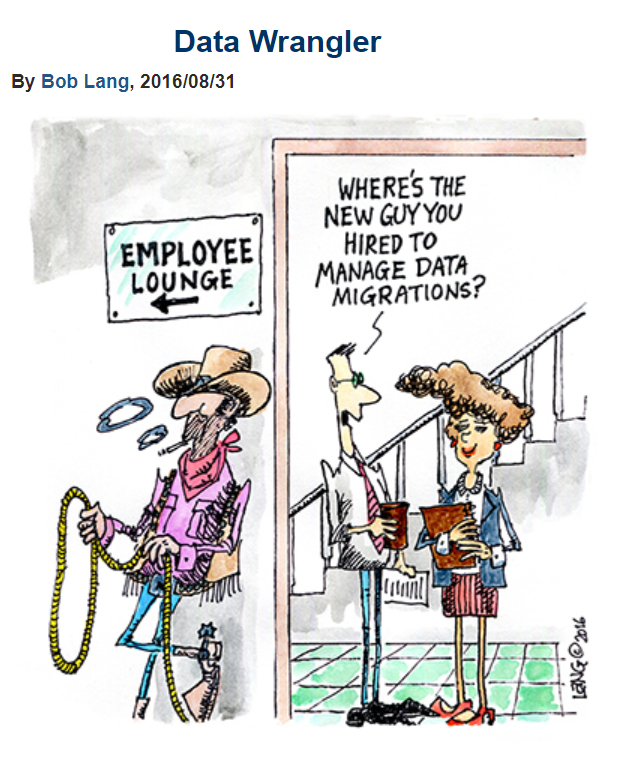

In [56]:
from IPython.display import Image
Image(filename='datawrangler.png') 

### BIG THANK YOU TO JWN ENERGY FOR THE USE OF THEIR DATA IN THIS PRESENTATION!